# Illustration du principe de l'interpolation

In [1]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

F = 1
c0 = "#008800"
c1 = "#0000ff"
c2 = "#cc0000"

def myplot(x1, y1, x2, y2, xx,yy, K, kind):
    
    N = len(x1)
    
    # Interpolation 1D
    
    fig, ax = plt.subplots()
    
    # Grille
#     ax.xaxis.set_minor_locator(MultipleLocator(1/K))
#     ax.xaxis.grid(True,'minor', linewidth=1, linestyle=":", color=c2)

#     ax.xaxis.set_major_locator(MultipleLocator(1))
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#     ax.xaxis.grid(True,'major', linewidth=1,  linestyle="-", color=c1)
    
    # Courbe d'interpolation
    ax.plot(xx, yy, color='gray', linewidth=.5)
    
    # Données originales et interpolées
    ax.plot(x1, y1, color='C0', linewidth=0, markersize=8, markeredgewidth=2, marker="o", fillstyle='none', )
    ax.plot(x2, y2, color='C1', linewidth=0, markersize=8, marker=".")

    ax.set_xlim(0,N-1)
    ax.set_ylim(0,1)
    ax.set_xticks(range(0,N))
    ax.set_yticks([0,1])
    plt.savefig(f"interp-{kind}-1d.svg", bbox_inches='tight')
    plt.show()
    
    # Interpolation 2D
    img = [np.concatenate( (y1,[1,1],y2) )]
    fig, ax = plt.subplots(figsize=(15,2))
    ax.imshow(img, vmin=0, vmax=1, cmap="gray", interpolation='none')
    ax.plot([-.5,N-.5,N-.5,-.5,-.5],[-.5,-.5,.5,.5,-.5],'k')
    ax.plot([(N+2)-.5,(N+N*K)-.5,(N+N*K)-.5,(N+2)-.5,(N+2)-.5],[-.5,-.5,.5,.5,-.5],'k')
    ax.text(N+.5,0,"→", va="center", ha="center", fontsize=30)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f"interp-{kind}-2d.svg", bbox_inches='tight')
    plt.show()

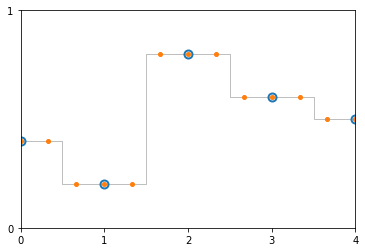

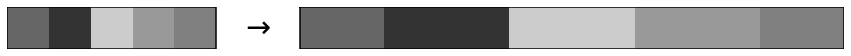

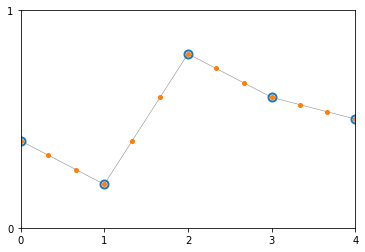

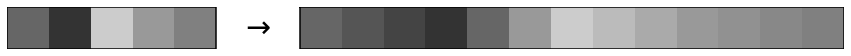

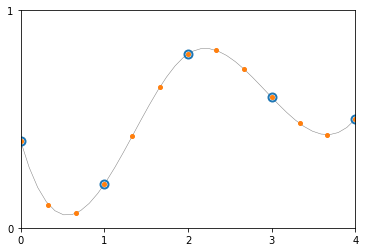

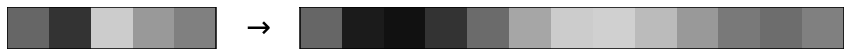

In [2]:
# Données
y1 = np.array([.4, .2, .8, .6, .5])
N = len(y1)
x1 = np.arange(N)

# Interpolation d'un facteur K
K = 3
x2 = np.arange(0, N-.999, 1/K)

# Interpolation linéaire
for kind in ['nearest', 'linear', 'cubic']:
    
    # Interpolation d'un facteur K
    f = interpolate.interp1d(x1, y1, kind=kind)
    y2 = f(x2)
    
    # Courbe d'interpolation
    xx = np.array([])
    yy = np.array([])
    if kind == 'nearest':
        for i in range(N):
            xx = np.append(xx, [x1[i]-.5,x1[i]+.5])
            yy = np.append(yy, [y1[i],y1[i]])
    if kind == 'linear':
        xx = x1
        yy = y1
    if kind == 'cubic':
        xx = np.linspace(0,N-1,40)
        yy = f(xx)
    
    myplot(x1, y1, x2, y2, xx, yy, K, kind)